In [1]:
import tkinter as tk
from tkinter import Tk, Label
from PIL import Image, ImageTk, ImageGrab
import win32gui
import win32con

import pygetwindow as gw

import dotenv

import os

In [2]:
screenshot = ImageGrab.grab()
screenshot_path = os.path.join(os.getcwd(), "screenshot1.png")
screenshot.save(screenshot_path)

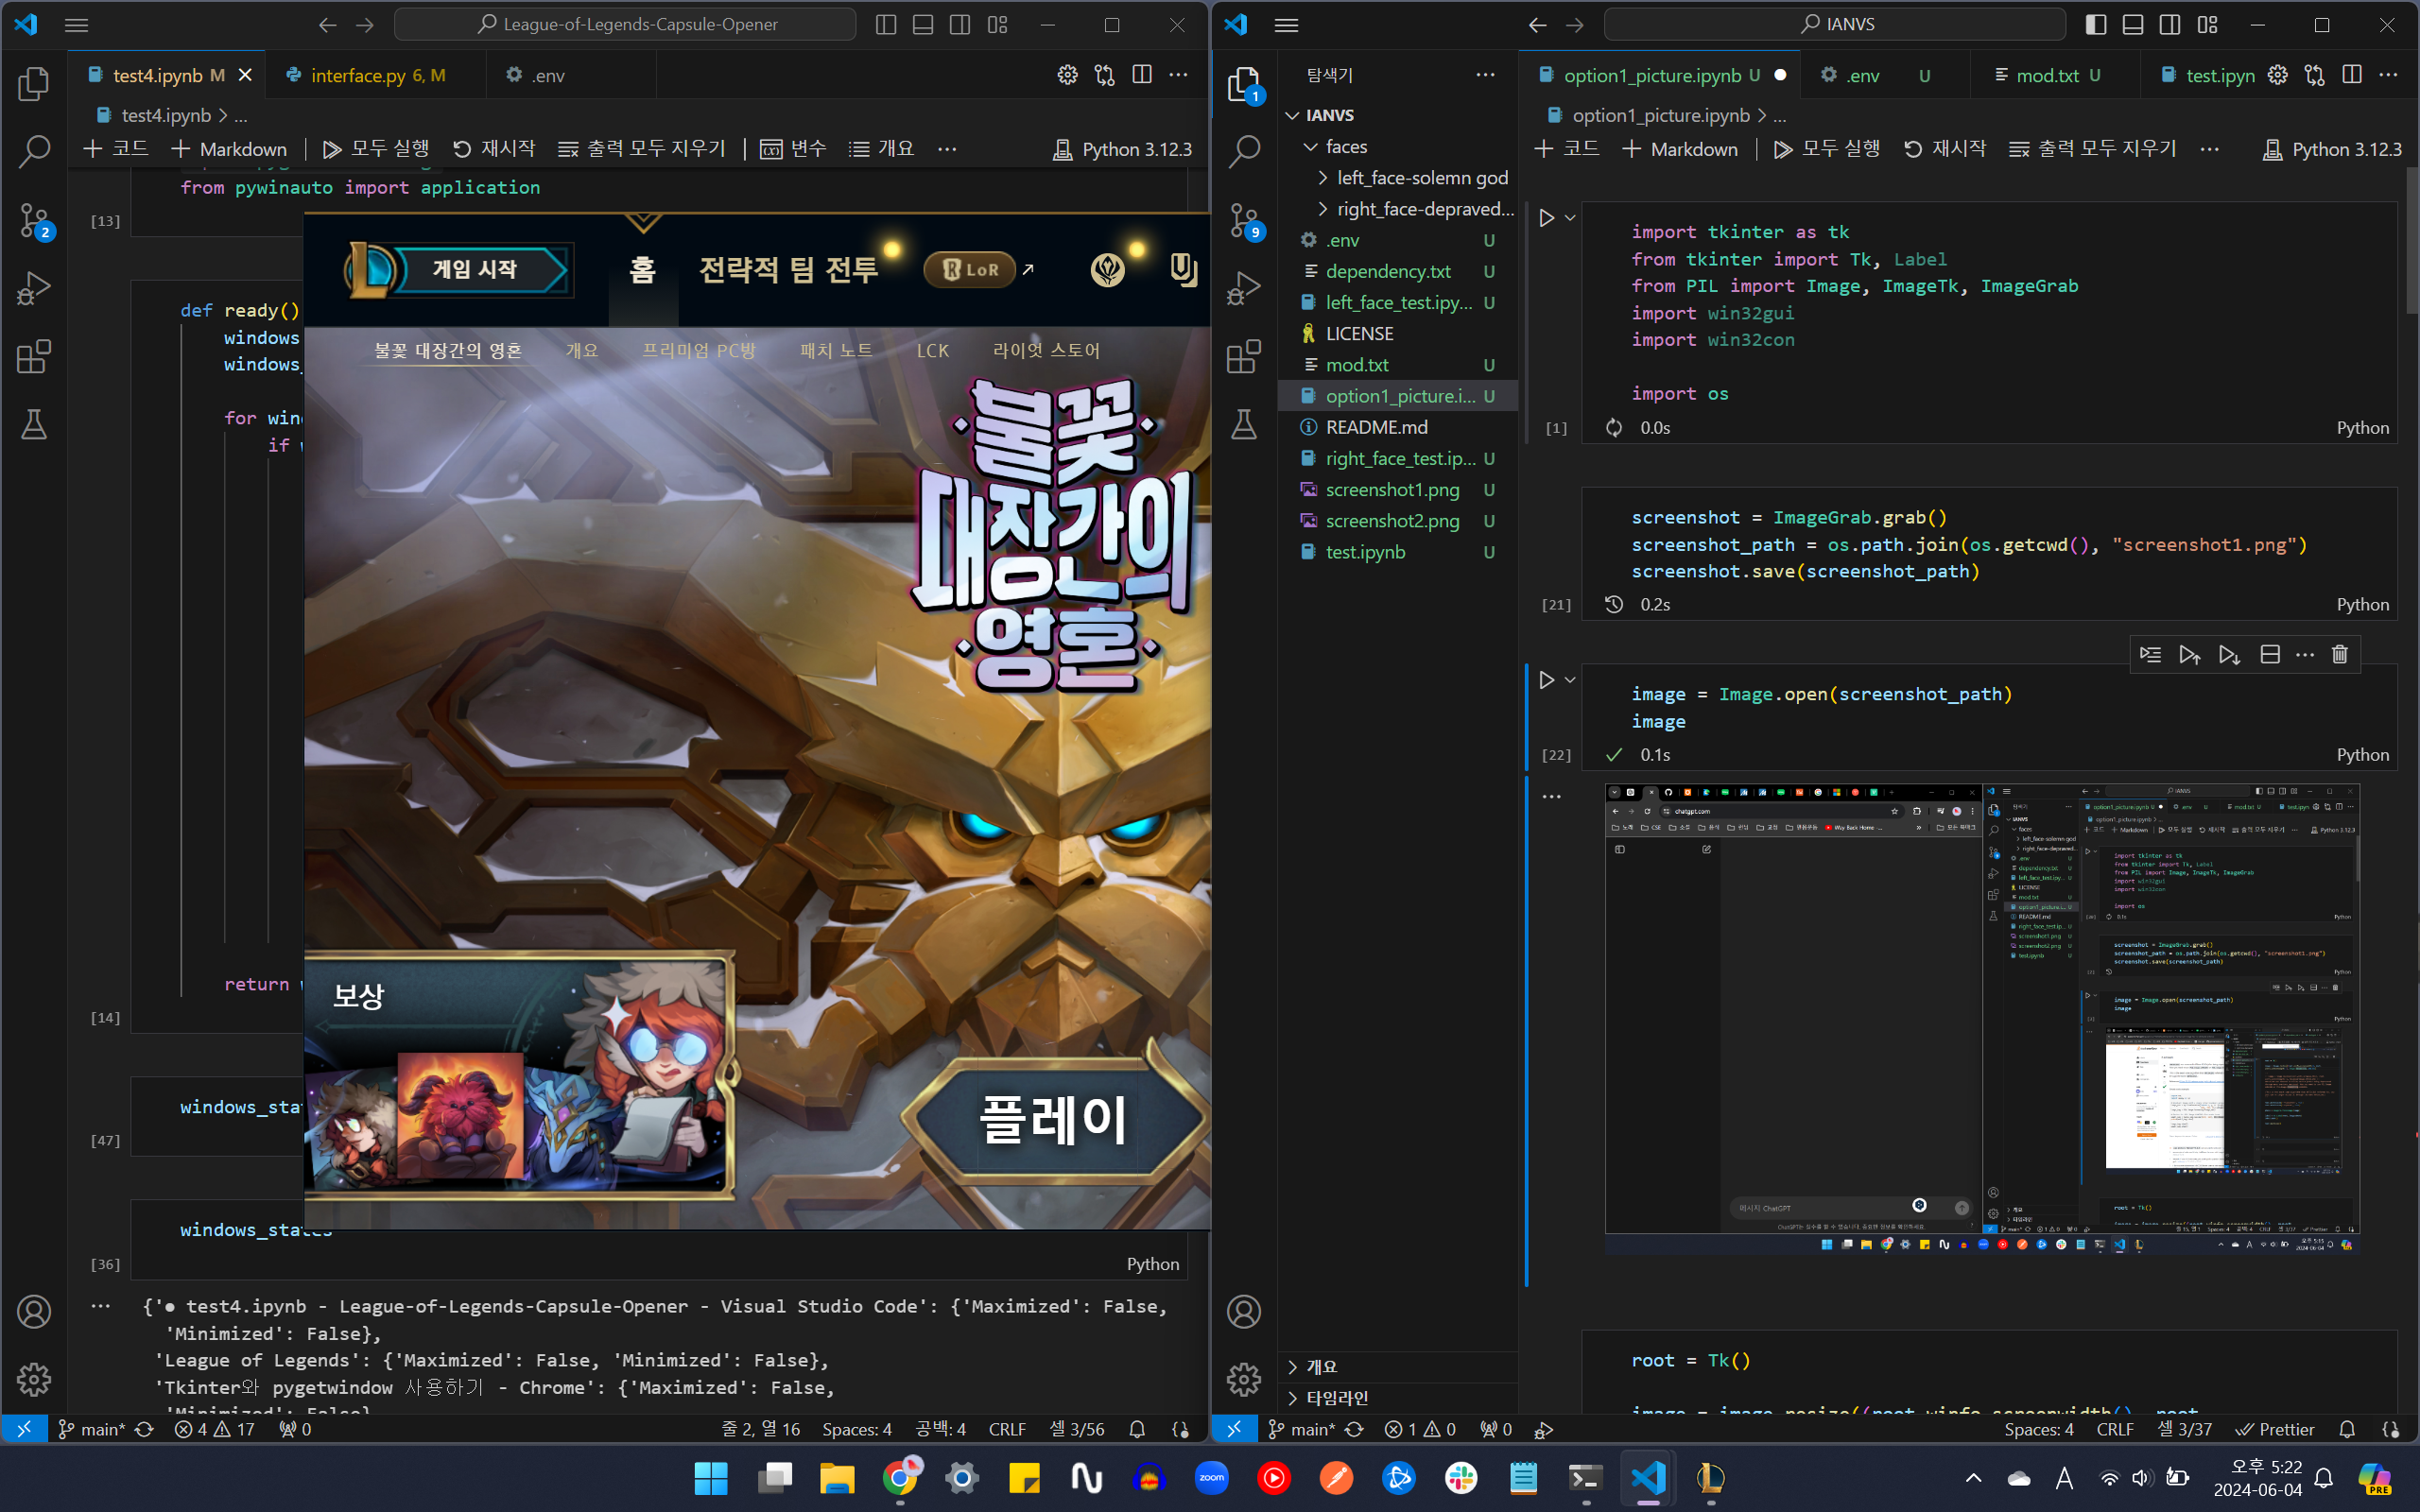

In [3]:
image = Image.open(screenshot_path)
image

In [23]:
root = Tk()

image = image.resize((root.winfo_screenwidth(), root.winfo_screenheight()), Image.Resampling.LANCZOS)

'''
!! image = image.resize((root.winfo_screenwidth(), root.winfo_screenheight()), resample=Image.ANTIALIAS) !!
ANTIALIAS was removed in Pillow 10.0.0 (after being deprecated through many previous versions). Now you need to use PIL.Image.LANCZOS or PIL.Image.Resampling.LANCZOS.

(This is the exact same algorithm that ANTIALIAS referred to, you just can no longer access it through the name ANTIALIAS.)
'''

root.attributes("-fullscreen", True)
root.attributes("-topmost", True) 

photo = ImageTk.PhotoImage(image)

label = tk.Label(root, image=photo)
label.pack()

root.mainloop()





In [18]:
'''
WS_EX_DLGMODALFRAME : 대화형 모달 프레임을 나타냅니다. 이 프레임은 대화 상자의 모서리에 표시되는 외곽선을 의미합니다.

WS_EX_NOPARENTNOTIFY : 부모 윈도우에 알림을 보내지 않는다는 것을 나타냅니다. 즉, 부모 윈도우에 자식 윈도우에서 발생한 이벤트를 알리지 않습니다.

WS_EX_TOPMOST : 윈도우를 항상 맨 위에 표시합니다. 다른 윈도우가 이 윈도우 위에 올라가지 않습니다.

WS_EX_ACCEPTFILES : 파일을 끌어서 놓을 수 있도록 허용합니다. 이는 파일 드롭을 지원하는 윈도우를 만들 때 사용됩니다.

WS_EX_TRANSPARENT : 윈도우를 투명하게 만듭니다. 이렇게 설정된 윈도우는 투명한 부분을 마우스 이벤트를 다음으로 전달합니다.

WS_EX_TOOLWINDOW : 도구 창을 나타냅니다. 이러한 윈도우는 작업 표시줄에 표시되지 않으며 주로 보조적인 역할을 수행합니다.

WS_EX_CLIENTEDGE : 클라이언트 영역에 3D 테두리를 생성합니다. 일반적으로 클라이언트 영역의 가장자리를 강조할 때 사용됩니다.

WS_EX_RIGHT : 윈도우를 오른쪽에서부터 시작하여 배치합니다. 기본적으로 윈도우는 왼쪽에서부터 시작하여 배치됩니다.

'''

'\nWS_EX_DLGMODALFRAME : 대화형 모달 프레임을 나타냅니다. 이 프레임은 대화 상자의 모서리에 표시되는 외곽선을 의미합니다.\n\nWS_EX_NOPARENTNOTIFY : 부모 윈도우에 알림을 보내지 않는다는 것을 나타냅니다. 즉, 부모 윈도우에 자식 윈도우에서 발생한 이벤트를 알리지 않습니다.\n\nWS_EX_TOPMOST : 윈도우를 항상 맨 위에 표시합니다. 다른 윈도우가 이 윈도우 위에 올라가지 않습니다.\n\nWS_EX_ACCEPTFILES : 파일을 끌어서 놓을 수 있도록 허용합니다. 이는 파일 드롭을 지원하는 윈도우를 만들 때 사용됩니다.\n\nWS_EX_TRANSPARENT : 윈도우를 투명하게 만듭니다. 이렇게 설정된 윈도우는 투명한 부분을 마우스 이벤트를 다음으로 전달합니다.\n\nWS_EX_TOOLWINDOW : 도구 창을 나타냅니다. 이러한 윈도우는 작업 표시줄에 표시되지 않으며 주로 보조적인 역할을 수행합니다.\n\nWS_EX_CLIENTEDGE : 클라이언트 영역에 3D 테두리를 생성합니다. 일반적으로 클라이언트 영역의 가장자리를 강조할 때 사용됩니다.\n\nWS_EX_RIGHT : 윈도우를 오른쪽에서부터 시작하여 배치합니다. 기본적으로 윈도우는 왼쪽에서부터 시작하여 배치됩니다.\n\n'

In [15]:
import win32gui
import win32con

previous_styles = {}

def hide_from_taskbar(window_title):
    global previous_styles
    
    hwnd = win32gui.FindWindow(None, window_title)
    
    if hwnd != 0:
        previous_styles[window_title] = win32gui.GetWindowLong(hwnd, win32con.GWL_EXSTYLE)
        
        style = win32gui.GetWindowLong(hwnd, win32con.GWL_EXSTYLE)

        print(previous_styles)
        print(style)




        style |= win32con.WS_EX_TOOLWINDOW # 비트연산을 하는 이유 -> '스타일'의 이진수 각 비트마다 다른 속성을 가리킴. 가령, WS_EX_TOOLWINDOW가 참인 경우는 2^7인 128이 됨 -> 2진수 1000000 -> 고로, 각 비트는 독립적임

        print(style)

        win32gui.SetWindowLong(hwnd, win32con.GWL_EXSTYLE, style)
        win32gui.ShowWindow(hwnd, win32con.SW_HIDE) # 요게 WS_EX_TOOLWINDOW와 같이 쓰여야 하는 이유 -> 느낌이 좀 다르긴 한데 설정 적용 이후 F5(새로고침)하는 것과 비슷함 -- 껍데기를 숨기는 거라고 해야 하나..

def show_in_taskbar(window_title):
    global previous_styles
    
    if window_title in previous_styles:
        hwnd = win32gui.FindWindow(None, window_title)
        win32gui.SetWindowLong(hwnd, win32con.GWL_EXSTYLE, previous_styles[window_title])
        win32gui.ShowWindow(hwnd, win32con.SW_SHOW)

        del previous_styles[window_title]


In [25]:
gw.getAllTitles()

['',
 '',
 '',
 '● option1_picture.ipynb - IANVS - Visual Studio Code',
 '윈도우 창 스타일 재부팅 - Google 검색 - Chrome',
 'test4.ipynb - League-of-Legends-Capsule-Opener - Visual Studio Code',
 'NVIDIA GeForce Overlay',
 'Windows 입력 환경',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '설정',
 '설정',
 '(515) 【진짜야 - 나츠노세】本当だよ feat.花本朔 - ナツノセ Piano弾き語りver. - YouTube - Chrome',
 '',
 '',
 'MINGW64:/c/Users/crypt/WorkSpace_C/projects_240529~/IANVS',
 '',
 '',
 'Program Manager']

In [2]:
env_path = os.getcwd() + r'\.env'

In [3]:
dotenv.load_dotenv(env_path)
#dotenv_file = dotenv.find_dotenv()

True

In [42]:
left_faces = os.environ.get("LEFT_FACES")
right_faces = os.environ.get("RIGTH_FACES")

In [106]:
gw.getAllTitles()

['',
 '',
 'option1_picture.ipynb - IANVS - Visual Studio Code',
 'test4.ipynb - League-of-Legends-Capsule-Opener - Visual Studio Code',
 'NVIDIA GeForce Overlay',
 'Windows 입력 환경',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '설정',
 '설정',
 '',
 '',
 'MINGW64:/c/Users/crypt/WorkSpace_C/projects_240529~/IANVS',
 'Python에서 환경변수 관리하기: 개발과 운영 환경 분리 - Chrome',
 'txt파일 쓰기, 읽기(open, read, write, close) - Chrome',
 '',
 '',
 'Program Manager']

In [20]:
def update_left_face():

    screenshot = ImageGrab.grab()
    screenshot_path = os.path.join(os.getcwd(), "left_face.png")
    screenshot.save(screenshot_path)

    titles = [title for title in gw.getAllTitles() if title != '']

    new_l_n = len(titles)
    old_l_n = int(os.environ.get("L_N"))


    if(old_l_n > new_l_n):
        for extra_n in range(new_l_n, old_l_n):
            dotenv.unset_key(env_path, 'LEFT_FACES' + str(extra_n))


    dotenv.set_key(env_path, 'L_N', str(len(titles)))

    for n, title in enumerate(titles):
        dotenv.set_key(env_path, 'LEFT_FACES' + str(n), title)
        

    dotenv.load_dotenv(env_path, override=True)
    # 진짜 씨 override=True 이걸 몰라서 몇 시간 날린 거임, 이거 없이 그냥 load하면 .env파일 수정사항 덮어쓰기가 안 된다.
    # 그렇다고 unload_dotenv()나 dotenv._environ.clear()를 해버리면 실행속도는 물론이고 다른 프로세스에서 사용하는 환경변수에도 영향이 가고

    

In [ ]:
# for mod2 : 완전한 분할
## 미완

def update_right_face(): 

    titles = [title for title in gw.getAllTitles() if title != '']

    new_l_n = len(titles)
    old_l_n = int(os.environ.get("R_N"))


    if(old_l_n > new_l_n):
        for extra_n in range(new_l_n, old_l_n):
            dotenv.unset_key(env_path, 'RIGHT_FACES' + str(extra_n))


    dotenv.set_key(env_path, 'L_N', str(len(titles)))

    for n, title in enumerate(titles):
        dotenv.set_key(env_path, 'RIGHT_FACES' + str(n), title)
        

    dotenv.load_dotenv(env_path, override=True)

In [17]:
dotenv.load_dotenv(env_path, override=True)
# 진짜 씨 override=True 이걸 몰라서 몇 시간 날린 거임, 이거 없이 그냥 load하면 .env파일 수정사항 덮어쓰기가 안 된다.
# 그렇다고 unload_dotenv()나 dotenv._environ.clear()를 해버리면 실행속도는 물론이고 다른 프로세스에서 사용하는 환경변수에도 영향이 가고

True

In [ ]:
def shook_right_face_up(mod=''):

    titles = [title for title in gw.getAllTitles() if title != '']
    for title in titles:
        hide_from_taskbar(title)

    

    


    

    
    



    pass





In [ ]:
def shook_left_face_up(mod=1):

    if mod==1:
        hide_from_taskbar()
    

    

    


    

    
    



    pass

In [ ]:
windows = gw.getAllTitles()

True

In [2]:
os.getenv('CHAMPION_CAPTULE')

'1'

In [36]:
os.environ["CHAMPION_CAPTULE"] = '2'

In [37]:
os.getenv('CHAMPION_CAPTULE')

'2'

In [ ]:
def update_right_face():
    

In [24]:
windows = gw.getAllTitles()
windows

['',
 '',
 '● option1_picture.ipynb - IANVS - Visual Studio Code',
 'KakaoTalkEdgeWnd',
 '유동준',
 'KakaoTalkShadowWnd',
 'LanceCharging/IANVS: The great god with two faces, Janubis, has... The left face, showing a solemn expression to uphold his divine dignity, while the right face bears the lewd expression of a depraved pervert. - Chrome',
 'test4.ipynb - League-of-Legends-Capsule-Opener - Visual Studio Code',
 'NVIDIA GeForce Overlay',
 'Windows 입력 환경',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '설정',
 '설정',
 '위젯',
 '',
 '',
 'MINGW64:/c/Users/crypt/WorkSpace_C/projects_240529~/IANVS',
 'League of Legends',
 '(514) I Really Want To Stay At Your House (Emo/Pop-Punk Cover) Cyberpunk: Edgerunners - YouTube - Chrome',
 '',
 '',
 'Program Manager']